In [30]:
#from jupyterthemes import jtplot
#jtplot.style('gruvboxl')

# Importing 
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')


from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime, timedelta
yf.pdr_override()
plt.rcParams["figure.figsize"] = [10,10]  # Set default figure size
import requests

In [3]:
def from_df_to_np(x):
    ''' 
    Convert DataFrame to numpy array
    ''' 
    return x.to_numpy().astype(float) #astype needed to show results

# $\longrightarrow$ Source

## Data

### Importing

In [4]:
def import_data(tickers, start, end, interval):
    
    interv = str(interval)
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    
    # empty dictionary to store the DataFrames
    dfs = {}

    # collect into a DataFrame
    for ticker in tickers:
        df = pdr.get_data_yahoo(f'{ticker}', pd.to_datetime(start), pd.to_datetime(end), interval = interv, repair = True)
        dfs[ticker] = df
    return dfs

In [5]:
tkrs = ['AAPL', 'ABBV', 'ABT', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AIG', 'AMAT', 'AMD',
    'AMGN', 'AMT', 'AMZN', 'AON', 'APA', 'APD', 'ATVI', 'AVGO', 'AXP', 'BA',
    'BAC', 'BAX', 'BBY', 'BDX', 'BK', 'BKNG', 'BLK', 'BMY', 'C',
    'CHTR', 'CI', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMI', 'CMS', 
    'COF', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DD', 'DE', 'DHR', 'DIS', 'DOW',
    'DTE', 'DUK', 'DVA', 'EA', 'EBAY', 'ECL', 'ED', 'EMN', 'EMR', 'EOG', 'EQR',
    'ES', 'ETN', 'EXC', 'EXPD', 'F', 'FDX', 'FE', 'FIS', 'FISV', 
    'FLR', 'FMC', 'FOX', 'FOXA', 'GD', 'GE', 'GILD', 'GIS', 'GLW', 'GM', 'GOOG',
    'GOOGL', 'GPC', 'GPN', 'GS', 'GWW', 'HAL', 'HAS', 'HD', 'HES', 'HIG', 'HON',
    'HPQ', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU',
    'IP', 'IPG', 'IQV', 'ISRG', 'IT', 'ITW', 'IVZ', 'JCI', 'JNJ', 'JPM', 'K',
    'KEY', 'KEYS', 'KHC', 'KMI', 'KO', 'KR', 'LEG', 'LH', 'LIN', 'LLY',
    'LMT', 'LOW', 'LRCX', 'LUV', 'LYB', 'MA', 'MAR', 'MAS', 'MCD', 'MCHP',
    'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MOS', 'MRK', 'MS', 'MSFT',
    'MU', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOV', 'NOW', 'NSC',
    'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'OKE', 'OMC', 'ORCL', 'OXY',
    'PAYX', 'PCAR', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM',
    'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU',
    'PSA']
len(tkrs) #192

183

In [6]:
# Interval of time
start='2005-01-01'
end='2022-12-23'

df_day = import_data(tkrs, start, end, interval = "1d")
#df_week = import_data(tkrs, start, end, interval = "1wk")
#df_month = import_data(tkrs, start, end, interval = "1mo")
#df_quart = import_data(tkrs, start, end, interval = "3mo")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

### Listed data

In [7]:
def listed_data(dfs, tickers, interval):
    global start, end
    
    def to_delete(dfs, start, end, interval):
        to_del = {}
        if interval == 'day':
            for ticker, df in dfs.items():
                start_date = df.index[0]
                end_date = df.index[-1]
                #print(f"{ticker} start date: {start_date}")
                if start_date > pd.to_datetime(start) + timedelta(days=5) or end_date < pd.to_datetime(end) - timedelta(days=5) : #safeness timedelta
                    to_del[ticker] = start_date
        if interval == 'week':
            for ticker, df in dfs.items():
                start_date = df.index[0]
                end_date = df.index[-1]
                #print(f"{ticker} start date: {start_date}")
                if start_date > pd.to_datetime(start) + timedelta(days=15) or end_date < pd.to_datetime(end) - timedelta(days=15) : #safeness timedelta
                    to_del[ticker] = start_date
        if interval == 'month':
            for ticker, df in dfs.items():
                start_date = df.index[0]
                end_date = df.index[-1]
                #print(f"{ticker} start date: {start_date}")
                if start_date > pd.to_datetime(start) + timedelta(days=34) or end_date < pd.to_datetime(end) - timedelta(days=34) : #safeness timedelta
                    to_del[ticker] = start_date
        if interval == 'quart':
            for ticker, df in dfs.items():
                start_date = df.index[0]
                end_date = df.index[-1]
                #print(f"{ticker} start date: {start_date}")
                if start_date > pd.to_datetime(start) + timedelta(days=95) or end_date < pd.to_datetime(end) - timedelta(days=95) : #safeness timedelta
                    to_del[ticker] = start_date
        return to_del
    
    def listed_tickers(tickers, to_del):
        listed_true = [x for x in tickers if x not in to_del.keys()]
        return listed_true

    def delete_unlisted(dfs, to_del):
        for key in to_del.keys():
            dfs.pop(key)
        return dfs
 
    to_del = to_delete(dfs, start, end, interval)
    listed_true = listed_tickers(tkrs, to_del)
    dfs = delete_unlisted(dfs, to_del)
    
    return dfs

In [8]:
def extract_tickers(df):
    tickers = list(df.keys()) 

    return tickers

def ind_ticks_to_sect(tickers):
    '''
    input: list of orderly tickers used
    return: a np list with elements corresponding to the sector at which the i-th stock belong.
    '''
    
    tick_sect = []
    
    for tik in tickers:
        a = yf.Ticker(str(tik))
        tick_sect.append(a.info['sector'])
        #print(f'{tik} is okay')
    return tick_sect

### Clean + Returns

In [9]:
def clean_data(dfs, prd=1):
    
    # Fill NaN values with the mean value for each variable across all the tickers
    for ticker, df in dfs.items():
        means = df.mean()  # Calculate the mean value for each variable in the DataFrame
        df.fillna(value=means, inplace=True)  # Fill NaN values with the mean value
    
    # Returns and log-returns and rescaled log
    for ticker, df in dfs.items():
        #df['returns'] = df['Adj Close'].diff()
        df['returns'] = df['Adj Close'].pct_change(periods = prd)
        df['log_returns'] = np.log(df['Adj Close']).diff(periods = prd)
        df['resc_log_ret'] = ( df['log_returns'] - df['log_returns'].mean() )/df['log_returns'].std()

    # drop the first row
    for ticker, df in dfs.items():
        df.drop(index=df.index[0:int(prd)], axis=0, inplace=True)
    
    # extract the rescaled logreturns price column from each dataframe and store them in a new dictionary
    returns = {}
    for symbol, df in dfs.items():
        returns[symbol] = df['resc_log_ret']
    # create a new dataframe containing the adjusted close price data for all stocks
    returns_df = pd.DataFrame(returns)
    
    return returns_df

In [10]:
def visualize_data(df):
    # Print the first few rows of each DataFrame
    for ticker, df in dfs.items():
        print(f'DataFrame for {ticker}:')
        print(df.head())
        #print(df.tail())
        print('\n')

### Store data in folder

Create functions to store cleaned data in a folder without having to actually re-run the program everytime you neeed

In [11]:
folder_path = './data/'

def store(dictionary):
    
    global folder_path
    for key, df in dictionary.items():
        file_path = folder_path + key + '.pkl'
        df.to_pickle(file_path)
        
def upload_data(correct_tickers):

    global folder_path
    tkrs = correct_tickers
    dfs = {}
    for key in tkrs:
        file_path = folder_path + key + '.pkl'
        dfs[key] = pd.read_pickle(file_path)  
    return dfs

## Correlation

### Eigen-decomposition & Pastur Marcenko

Eigedecomposition and Marcenko-Pastur distribution:

In [12]:
from sklearn.neighbors import KernelDensity
import matplotlib.pylab as plt
from scipy.optimize import minimize
from scipy.linalg import block_diag
from sklearn.covariance import LedoitWolf


# q=T/N time steps divided by the number of companies
def mpPDF(var, q, pts):
    eMin, eMax = var*(1-(1./q)**.5)**2, var*(1+(1./q)**.5)**2 # calc lambda_minus, lambda_plus
    eVal = np.linspace(eMin, eMax, pts) #Return evenly spaced numbers over a specified interval. eVal='lambda'
    #Note: 1.0/2*2 = 1.0 not 0.25=1.0/(2*2)
    pdf = q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5 #np.allclose(np.flip((eMax-eVal)), (eVal-eMin))==True
    pdf = pd.Series(pdf, index=eVal)
    return pdf

# Get PCA
def getPCA(matrix):
    '''
    Get eVal, eVec from a Hermitian matrix
    '''
    eVal, eVec = np.linalg.eigh(matrix) #complex Hermitian (conjugate symmetric) or a real symmetric matrix.
    eVal = np.diagflat(eVal) # identity matrix with eigenvalues as diagonal
    return eVal,eVec

def fitKDE(obs, bWidth=.15, kernel='gaussian', x=None):
    '''
    Fit kernel to a series of obs, and derive the prob of obs 
    x is the array of values on which the fit KDE will be evaluated
    '''
    #print(len(obs.shape) == 1)
    if len(obs.shape) == 1: obs = obs.reshape(-1,1)
    kde = KernelDensity(kernel = kernel, bandwidth = bWidth).fit(obs)
    #print(x is None)
    if x is None: x = np.unique(obs).reshape(-1,1)
    #print(len(x.shape))
    if len(x.shape) == 1: x = x.reshape(-1,1)
    logProb = kde.score_samples(x) # log(density)
    pdf = pd.Series(np.exp(logProb), index=x.flatten())
    return pdf

In [13]:
def visualize_pm_eig(N, T, corr):
    Q = T/N
    
    #get eigendecomposition
    eVal0 , eVec0 = getPCA( corr ) 
    pdf1 = fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf
    pdf0 = mpPDF(1., Q, pts=N)


    # KDE and Marcenko-Pastur, and histogram
    fig = plt.figure()
    ax  = fig.add_subplot(111)
    ax.hist(np.diag(eVal0), density = True, bins=150, label="Eiganvalues") # Histogram the eigenvalues
    plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
    plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")


    #plotting
    plt.yscale('log') ## lOG SCALE
    #plt.xscale('log')
    plt.legend(loc="upper right")
    plt.show()

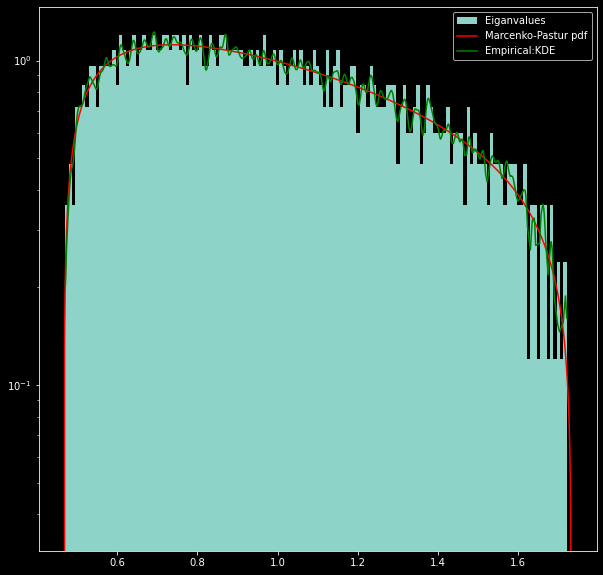

In [14]:
N = 1000
T = 10000
x = np.random.normal(0, 1, size = (T, N))
cor = np.corrcoef(x, rowvar=0) 
visualize_pm_eig(N, T, cor)

In [15]:
def visualize_mode(eVec, corr, mode=-1):
    fig, ax = plt.subplots(figsize=(16,9))
    
    plt.xlabel("index")
    plt.ylabel("intensity")
    
    ax.plot(eVec[:, int(mode)].flatten())
    ax.axhline(0, c="green")
    ax.axhline([1 / (len(corr))**0.5], c="red")
    if mode == -1:
        ax.set_ylim(-0.05, 0.2)
    
    plt.show()
    return fig

### Sectors

In [16]:
def sectors(tk_ind):
    
    idx_by_sector = np.argsort(tk_ind) #tick is my list that assign at each ticker the corresponding sector

    # create dictionary mapping sectors to tickers
    sector_dict = {}
    for i in range(len(tk_ind)):
        sector = tk_ind[i]
        if sector not in sector_dict:
            sector_dict[sector] = []
        sector_dict[sector].append(i)

    # sort sector names alphabetically
    sector_names = sorted(sector_dict.keys())

    # create list of sector labels and corresponding indices
    sector_labels = []
    sector_indices = []
    for sector in sector_names:
        sector_labels.append(sector)
        for i in idx_by_sector:
            if i in sector_dict[sector]:
                sector_indices.append(idx_by_sector.tolist().index(i) + 1) # +1 just to translate it graphically
                break
    return idx_by_sector, sector_dict, sector_indices, sector_labels

In [21]:
def plot_by_sector(mode, tk_ind, eVec):
    
    
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(eVec[idx_by_sector, int(mode)].flatten())
    ax.axhline(0, c="green")
    #ax.set_ylim(-0.05, 0.2)
    # set x-axis labels
    ax.set_xticks(sector_indices)
    ax.set_xticklabels(sector_labels, rotation=45)

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'brown', 'pink', 'gray', 'black', 'cyan'] # list of colors
    color_idx = 0


    # plot vertical lines at sector boundaries
    prev_sector = tk_ind[idx_by_sector[0]]
    for i in range(1, len(idx_by_sector)):
        curr_sector = tk_ind[idx_by_sector[i]]
        if curr_sector != prev_sector:
            ax.axvline(i-0.5, linestyle='-', color='grey')
            ax.fill_between([i-1, i], -0.1, 0.1, color=colors[color_idx], alpha=0.4)
            #ax.fill_between([i-1, i], ax.get_ylim()[0], ax.get_ylim()[1], color=colors[color_idx], alpha=0.1)
            color_idx = (color_idx + 1) % len(colors) # cycle through the list of colors

            prev_sector = curr_sector

    plt.title("plotting the {0} mode".format(mode))
    plt.show()
    

# Main

In [22]:
## Only listed data
#------
df_day = listed_data(df_day, tkrs, interval = 'day')
#df_week = listed_data(df_week, tkrs, interval = 'week')
#df_month = listed_data(df_week, tkrs, interval = 'month')
#df_quart = listed_data(df_week, tkrs, interval = 'quart')

## What's the industry of each stock
#------
tickers = extract_tickers(df_day)
tkrs_industry = ind_ticks_to_sect(tickers)
idx_by_sector, sector_dict, sector_indices, sector_labels = sectors(tkrs_industry)

### daily

In [19]:
# returns
returns_d = clean_data(df_day, prd=1)

# correlations
corr_d = returns_d.corr(method = 'pearson')
eVal_d , eVec_d = getPCA( corr_d ) 

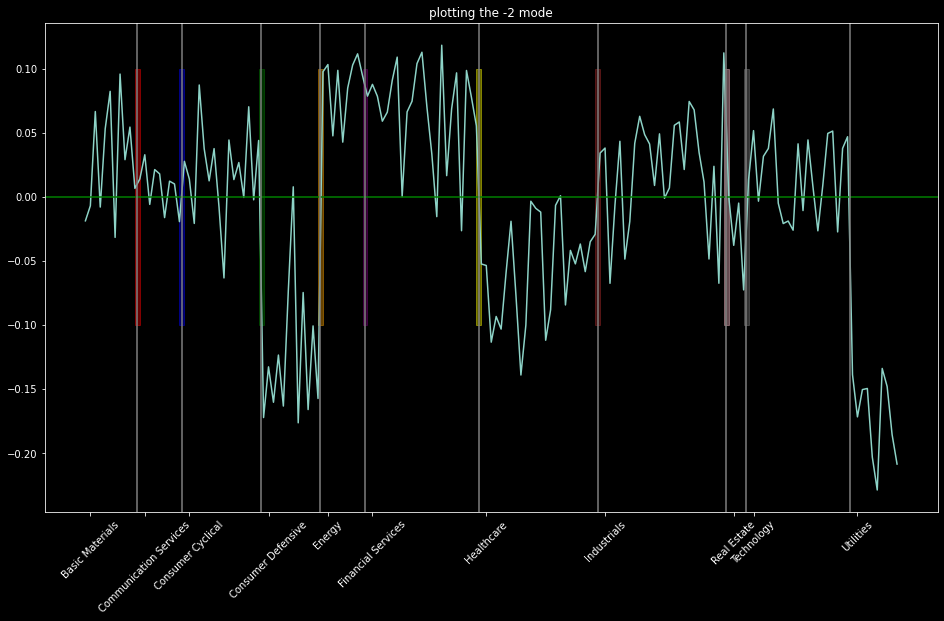

In [23]:
N = len(corr_d)
T = len(returns_d)

#visualize_pm_eig(N, T, corr_d)

#fig = visualize_mode(eVec_d, corr_d, mode=-1)
#fig.show()

plot_by_sector(mode=-2, tk_ind = tkrs_industry, eVec = eVec_d)

### weekly

In [24]:
# returns
returns_w = clean_data(df_day, prd=7)

# correlations
corr_w = returns_w.corr(method = 'pearson')
eVal_w, eVec_w = getPCA(corr_w) 

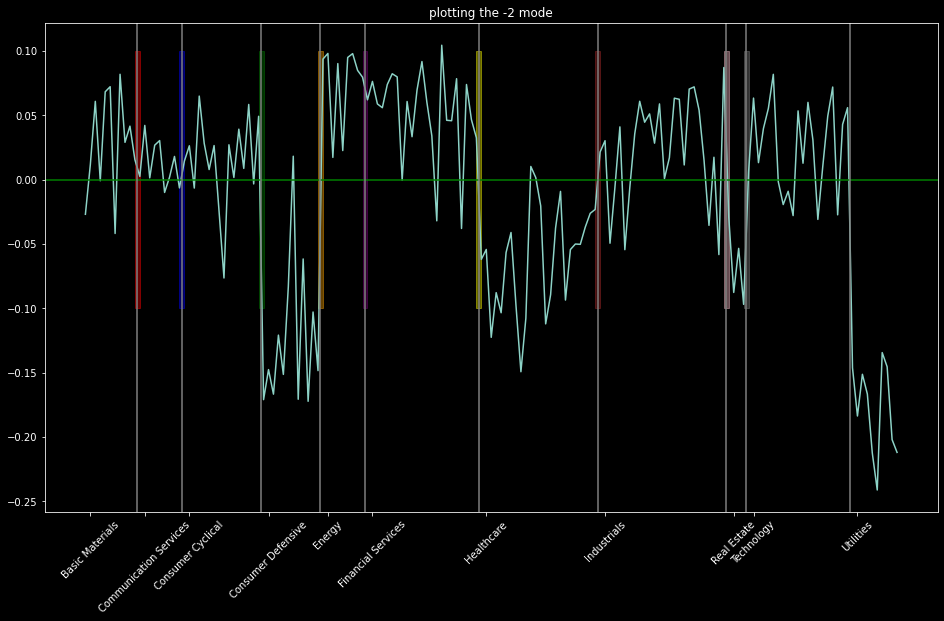

In [26]:
plot_by_sector(mode=-2, tk_ind = tkrs_industry, eVec = eVec_w)

### monthly

In [27]:
# returns
returns_m= clean_data(df_day, prd=30)

# correlations
corr_m = returns_m.corr(method = 'pearson')
eVal_m, eVec_m = getPCA(corr_m) 

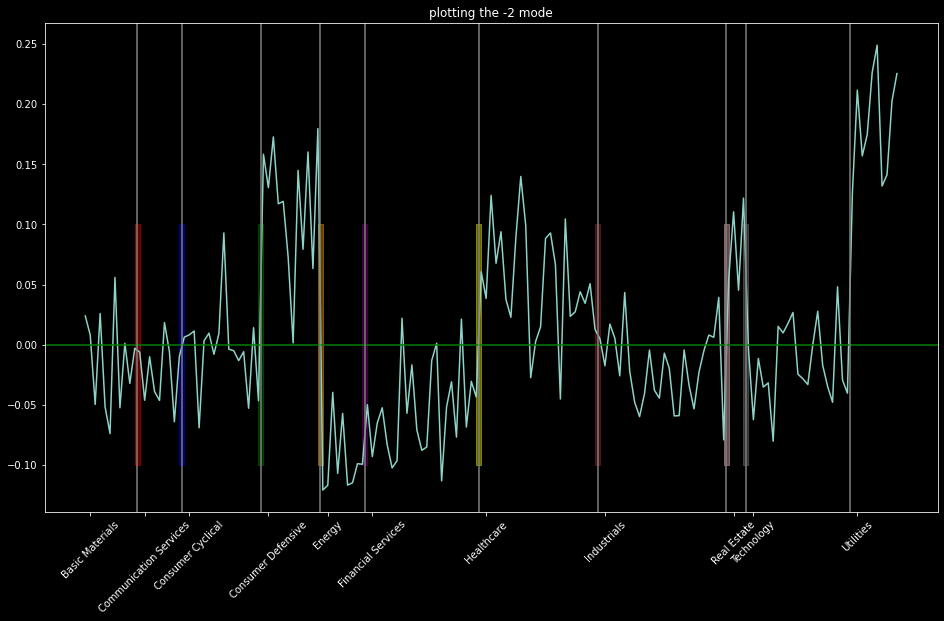

In [29]:
plot_by_sector(mode=-2, tk_ind = tkrs_industry, eVec = eVec_m)

 eigenvector dynamics ... bouchaud. > 2.4 in d (vo, v1)

look how the (metric bouchaud) changes varying the frequency in the x-axiss